In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from tqdm import tqdm
import os
import numpy as np
import cv2
import numpy
from keras.utils import np_utils


Using TensorFlow backend.


In [0]:
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
# X_train = torch.tensor(X_train / 255.0)
# X_test = torch.tensor(X_test / 255.0)

In [0]:
# y_train = torch.tensor(np_utils.to_categorical(y_train))
# y_test = torch.tensor(np_utils.to_categorical(y_test))
# num_classes = y_test.shape[1]
# inp_r=X_test.shape[1]

In [0]:
class Net(nn.Module):
    def __init__(self,num_of_output=2,input_channel=1,input_row=32,input_col=32):
        super().__init__()
        self.conv1=nn.Conv2d(input_channel,96,11,stride=4)

        self.conv2=nn.Conv2d(96,256,5,stride=1,padding=2)

        self.conv3=nn.Conv2d(256,384,3,stride=1,padding=1)

        self.conv4=nn.Conv2d(384,384,3,stride=1,padding=1)

        self.conv5=nn.Conv2d(384,256,3,stride=1,padding=1)
        
        x=torch.randn(input_channel,input_row,input_col).view(-1,input_channel,input_row,input_col)

        self.flat=0
        
        self.flatten(x)
        
        self.fc6=nn.Linear(self.flat,4096)
        
        self.fc7=nn.Linear(4096,4096)

        self.fc8=nn.Linear(4096,1000)

        self.fc9=nn.Linear(1000,num_of_output)

        
    def flatten(self,x):
        if(self.flat==0):

            x=f.max_pool2d(f.relu(self.conv1(x)),3,stride=2)


            x=f.max_pool2d(f.relu(self.conv2(x)),3,stride=2)

            x=f.relu(self.conv3(x))

            x=f.relu(self.conv4(x))

            x=f.max_pool2d(f.relu(self.conv5(x)),3,stride=2)

            self.flat=x[0].shape[0]*x[0].shape[1]*x[0].shape[2]


        
    def forward(self,x):
        x=f.max_pool2d(f.relu(self.conv1(x)),3,stride=2)

        x=f.max_pool2d(f.relu(self.conv2(x)),3,stride=2)

        x=f.relu(self.conv3(x))

        x=f.relu(self.conv4(x))

        x=f.max_pool2d(f.relu(self.conv5(x)),3,stride=2)

        x=f.dropout(f.relu(self.fc6(x.view(-1,self.flat))))

        x=f.dropout(f.relu(self.fc7(x)))

        x=f.relu(self.fc8(x))

        x=f.relu(self.fc9(x))

        return f.softmax(x,dim=1)

In [0]:
net=Net(2,1,96,96)

In [0]:
# net=Net()

In [0]:
# x=torch.randn(100,100).view(-1,1,100,100)
# type(x)

In [0]:
# y=net.forward(x)

In [0]:
# y


In [11]:
import tensorflow_datasets as tfds
pcam, pcam_info = tfds.load("patch_camelyon", with_info=True)
print(pcam_info)

tfds.core.DatasetInfo(
    name='patch_camelyon',
    version=2.0.0,
    description='The PatchCamelyon benchmark is a new and challenging image classification
dataset. It consists of 327.680 color images (96 x 96px) extracted from
histopathologic scans of lymph node sections. Each image is annoted with a
binary label indicating presence of metastatic tissue. PCam provides a new
benchmark for machine learning models: bigger than CIFAR10, smaller than
Imagenet, trainable on a single GPU.
',
    homepage='https://patchcamelyon.grand-challenge.org/',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(96, 96, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=327680,
    splits={
        'test': 32768,
        'train': 262144,
        'validation': 32768,
    },
    supervised_keys=('image', 'label'),
    citation="""@misc{b_s_veeling_j_linmans_j_winkens_t_cohen_2018

In [0]:

import matplotlib.pyplot as plt


Label:  [1.]


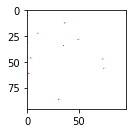

In [27]:
i=0
for example in pcam['train'].take(1):  # Only take a single example
  image, label = example["image"], example["label"]
  plt.subplot(220 + 1 + i)
  i+=1
  plt.imshow(image.numpy()[:, :, 0].astype(np.float32))
  print("Label: ", np_utils.to_categorical(label.numpy()))


In [14]:
image.shape
# reference:https://www.tensorflow.org/datasets/overview : https://geertlitjens.nl/post/getting-started-with-camelyon/

TensorShape([96, 96, 3])

In [0]:
images=[]
labels=[]
for example in pcam['train'].take(10000): 
  image, label = example["image"], example["label"]
  images.append(image.numpy()[:,:,0].astype(np.float32)/255)
  labels.append(label.numpy())


In [0]:
images=torch.tensor(images)


In [40]:
images.shape

torch.Size([10000, 96, 96])

In [0]:
labels = torch.tensor(np_utils.to_categorical(labels))

In [0]:
X_train=images[:9001]
X_test=images[9001:]

In [0]:
y_train=labels[:9001]
y_test=labels[9001:]

In [48]:
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
batch=100
epochs=10
train_set_x=X_train
train_set_y=y_train
lossFunc=nn.MSELoss()
for epoch in range(epochs):
    for i in tqdm(range(0,len(X_train),batch)):
        x=train_set_x[i:i+batch]
        y=train_set_y[i:i+batch]
        net.zero_grad()
        output=net(x.view(-1,1,96,96))
        loss=lossFunc(output,y)
        loss.backward()
        optimizer.step()
    print("\n",loss)

  0%|          | 0/91 [00:00<?, ?it/s]


 tensor(0.2500, grad_fn=<MseLossBackward>)


  0%|          | 0/91 [00:00<?, ?it/s]


 tensor(0.2500, grad_fn=<MseLossBackward>)


  0%|          | 0/91 [00:00<?, ?it/s]


 tensor(0.2500, grad_fn=<MseLossBackward>)


  0%|          | 0/91 [00:00<?, ?it/s]


 tensor(0.2500, grad_fn=<MseLossBackward>)


 22%|██▏       | 20/91 [00:41<02:27,  2.08s/it]

KeyboardInterrupt: ignored

In [49]:
n=len(y_test)
cor=0
for i in tqdm(range(0,n,100)):
    x=X_test[i:i+100]
    y=y_test[i:i+100]
    output_test=net(x.view(-1,1,96,96))
    for l in range(len(y)):
        if (y[l].argmax())==(output_test[l].argmax()):
            cor+=1
print("\naccuracy=",cor/n)


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


accuracy= 0.4934934934934935
